In [161]:
import numpy as np
import pandas as pd
import random
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
bank_data = pd.read_csv("./bank.csv", sep=";")
bank_data.head(100)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,41,unknown,single,tertiary,no,1567,no,no,cellular,1,jul,291,2,-1,0,unknown,no
96,41,admin.,married,tertiary,no,5426,yes,no,unknown,14,may,149,2,-1,0,unknown,no
97,30,admin.,single,tertiary,no,261,no,no,cellular,19,oct,233,1,137,20,failure,no
98,36,blue-collar,divorced,secondary,no,2843,no,no,cellular,12,feb,473,1,182,1,success,no


In [163]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [164]:
bank_data.y.value_counts()

,count
y,
no,4000
yes,521


<Axes: xlabel='count', ylabel='y'>

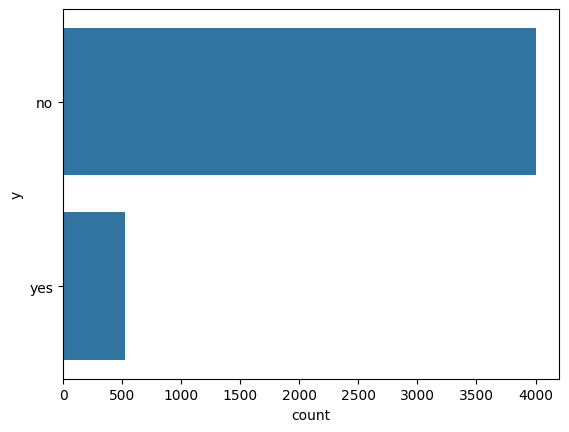

In [165]:
sns.countplot(bank_data.y)

In [166]:
print("Porcentaje de clasificación:")
bank_data.y.value_counts() / len(bank_data) * 100

Porcentaje de clasificación:


,count
y,
no,88.476001
yes,11.523999


In [167]:
bank_data.isnull().sum() / len(bank_data) * 100

,0
age,0.0
job,0.0
marital,0.0
education,0.0
default,0.0
balance,0.0
housing,0.0
loan,0.0
contact,0.0
day,0.0


In [168]:
bank_unknown_contact = ( (bank_data['contact'] == "unknown").sum() / len(bank_data) )* 100
bank_unknown_poutcome = ( (bank_data['poutcome'] == "unknown").sum() / len(bank_data) )* 100
bank_unknown_job = ( (bank_data['job'] == "unknown").sum() / len(bank_data) )* 100
bank_unknown_educational = ( (bank_data['education'] == "unknown").sum() / len(bank_data) )* 100
print(f"El pocentaje para los valores 'unknown' en contact es {bank_unknown_contact} %")
print(f"El pocentaje para los valores 'unknown' en poutcome es {bank_unknown_poutcome} %")
print(f"El pocentaje para los valores 'unknown' en job es {bank_unknown_job} %")
print(f"El pocentaje para los valores 'unknown' en education es {bank_unknown_educational} %")

El pocentaje para los valores 'unknown' en contact es 29.285556292855563 %
El pocentaje para los valores 'unknown' en poutcome es 81.95089581950896 %
El pocentaje para los valores 'unknown' en job es 0.8405220084052201 %
El pocentaje para los valores 'unknown' en education es 4.13625304136253 %


In [169]:
bank_data = bank_data.drop(columns=['contact'])
bank_data = bank_data.drop(columns=['poutcome'])

In [170]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no


In [171]:
yes_no_cols = ['y', 'housing','loan','default']
for col in yes_no_cols:
    bank_data[col] = bank_data[col].replace({'yes': 1, 'no': 0})

cat_cols = bank_data.select_dtypes(include='object').columns
for col in cat_cols:
  mode_value = bank_data[col].mode()[0]
  bank_data[col] = bank_data[col].replace('unknown',mode_value)

<ipython-input-171-d11b0742ede8>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_data[col] = bank_data[col].replace({'yes': 1, 'no': 0})


In [172]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,0,1787,0,0,19,oct,79,1,-1,0,0
1,33,services,married,secondary,0,4789,1,1,11,may,220,1,339,4,0
2,35,management,single,tertiary,0,1350,1,0,16,apr,185,1,330,1,0
3,30,management,married,tertiary,0,1476,1,1,3,jun,199,4,-1,0,0
4,59,blue-collar,married,secondary,0,0,1,0,5,may,226,1,-1,0,0


In [173]:
bank_unknown_job = ( (bank_data['job'] == "unknown").sum() / len(bank_data) )* 100
bank_unknown_educational = ( (bank_data['education'] == "unknown").sum() / len(bank_data) )* 100
print(f"El pocentaje para los valores 'unknown' en job es {bank_unknown_job} %")
print(f"El pocentaje para los valores 'unknown' en education es {bank_unknown_educational} %")

El pocentaje para los valores 'unknown' en job es 0.0 %
El pocentaje para los valores 'unknown' en education es 0.0 %


In [174]:
bank_data = pd.get_dummies(bank_data, columns=cat_cols)
bank_data = bank_data.astype(int)

In [175]:
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,30,0,1787,0,0,19,79,1,-1,0,...,0,0,0,0,0,0,0,0,1,0
1,33,0,4789,1,1,11,220,1,339,4,...,0,0,0,0,0,0,1,0,0,0
2,35,0,1350,1,0,16,185,1,330,1,...,0,0,0,0,0,0,0,0,0,0
3,30,0,1476,1,1,3,199,4,-1,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,0,1,0,5,226,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [176]:
X = bank_data.drop(columns = ['y'])
Y = bank_data['y']

In [178]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)
scaled_features.columns= X.columns

In [179]:
scaled_features.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,-1.056270,-0.130759,0.121072,-1.142051,-0.424756,0.374052,-0.711861,-0.576829,-0.407218,-0.320413,...,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,-0.669064,-0.306828,7.450671,-0.107869
1,-0.772583,-0.130759,1.118644,0.875617,2.354292,-0.596026,-0.169194,-0.576829,2.989044,2.041734,...,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869
2,-0.583458,-0.130759,-0.024144,0.875617,-0.424756,0.010273,-0.303898,-0.576829,2.899143,0.270124,...,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869
3,-1.056270,-0.130759,0.017726,0.875617,2.354292,-1.566105,-0.250017,0.387967,-0.407218,-0.320413,...,-0.066659,-0.227244,-0.183968,-0.430185,2.741190,-0.104676,-0.669064,-0.306828,-0.134216,-0.107869
4,1.686036,-0.130759,-0.472753,0.875617,-0.424756,-1.323585,-0.146102,-0.576829,-0.407218,-0.320413,...,-0.066659,-0.227244,-0.183968,-0.430185,-0.364805,-0.104676,1.494626,-0.306828,-0.134216,-0.107869


In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [182]:
train_data = pd.concat([X_train, Y_train], axis = 1)

In [184]:
train_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y
4153,42,0,440,1,0,3,13,5,-1,0,...,1,0,0,0,0,0,0,0,0,0
2085,33,0,-77,1,0,28,151,3,-1,0,...,0,0,1,0,0,0,0,0,0,0
1891,32,0,656,1,1,20,148,2,-1,0,...,0,0,0,0,0,0,0,0,0,0
3611,28,0,389,1,0,11,15,7,-1,0,...,0,0,0,0,0,1,0,0,0,0
4015,36,0,5902,1,0,23,219,4,-1,0,...,0,0,0,0,0,1,0,0,0,0


In [190]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
sm = SMOTE(random_state=25, sampling_strategy=1.0)

# Ajustar y muestrear los datos
X_train, Y_train = sm.fit_resample(X_train, Y_train)


In [194]:
np.unique(Y_train, return_counts=True)

(array([0, 1]), array([2795, 2795]))

In [198]:
train_data = X_train.copy()
train_data['target'] = Y_train.values

train_data.to_csv('bank_data_transformed.csv', index=False)